## CIFAR100 - Hyperparameter Tuning

In [1]:
import keras
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#normalize
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#categorical to one hot encoded
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

169009152/169001437 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
print(y_test.shape)
print(y_train.shape)

(10000, 100)
(50000, 100)


In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(100,activation='softmax')
])

In [20]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')
history=model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 54s 44ms/step - loss: 3.9309 - accuracy: 0.1030 - val_loss: 3.4810 - val_accuracy: 0.1707
Epoch 2/20
1250/1250 [==============================] - 54s 43ms/step - loss: 3.2635 - accuracy: 0.2119 - val_loss: 3.1702 - val_accuracy: 0.2234
Epoch 3/20
1250/1250 [==============================] - 54s 43ms/step - loss: 2.9467 - accuracy: 0.2733 - val_loss: 2.9071 - val_accuracy: 0.2800
Epoch 4/20
1250/1250 [==============================] - 54s 43ms/step - loss: 2.7201 - accuracy: 0.3170 - val_loss: 2.8186 - val_accuracy: 0.3013
Epoch 5/20
1250/1250 [==============================] - 54s 43ms/step - loss: 2.5430 - accuracy: 0.3531 - val_loss: 2.7339 - val_accuracy: 0.3182
Epoch 6/20
1250/1250 [==============================] - 54s 43ms/step - loss: 2.3925 - accuracy: 0.3842 - val_loss: 2.8045 - val_accuracy: 0.3091
Epoch 7/20
1250/1250 [==============================] - 54s 43ms/step - loss: 2.2584 - accuracy: 0.4120 - val_loss: 2.7644 -

313/313 - 4s - loss: 3.8394 - accuracy: 0.3226


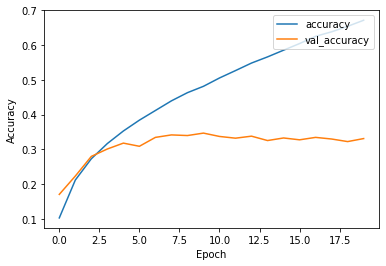

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')


In [22]:
model.evaluate(X_test,y_test, verbose=2)

313/313 - 4s - loss: 3.8394 - accuracy: 0.3226


[3.839434862136841, 0.32260000705718994]

## Hypertuning the model

In [3]:
from keras.models import Sequential                         
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, Adam, RMSprop

model1 = Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.1))
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.1))
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(100,activation='softmax'))


In [4]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit(X_train,y_train,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
1250/1250 [==============================] - 7s 5ms/step - loss: 4.0992 - accuracy: 0.0682 - val_loss: 3.7133 - val_accuracy: 0.1216
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 3.4521 - accuracy: 0.1696 - val_loss: 3.2164 - val_accuracy: 0.2085
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 3.0723 - accuracy: 0.2396 - val_loss: 2.9449 - val_accuracy: 0.2657
Epoch 4/50
1250/1250 [==============================] - 7s 5ms/step - loss: 2.8000 - accuracy: 0.2913 - val_loss: 2.7338 - val_accuracy: 0.3179
Epoch 5/50
1250/1250 [==============================] - 7s 5ms/step - loss: 2.5959 - accuracy: 0.3301 - val_loss: 2.6394 - val_accuracy: 0.3324
Epoch 6/50
1250/1250 [==============================] - 7s 5ms/step - loss: 2.4196 - accuracy: 0.3681 - val_loss: 2.5386 - val_accuracy: 0.3547
Epoch 7/50
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2759 - accuracy: 0.3970 - val_loss: 2.5142 - val_accuracy:

In [5]:
model1.evaluate(X_test,y_test,batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 3.1632 - accuracy: 0.4020


[3.163231134414673, 0.4020000100135803]